<a href="https://colab.research.google.com/github/Bhagyeshkasar/IPL-Data-Analysis-Using-Python/blob/main/IPL_Data_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis on IPL Data
The Indian Premier League is a professional Twenty20 cricket league, contested by eight teams based out of eight different Indian cities.   In this project, I have worked on IPL Data Analysis and Visualization using Python where I will explore interesting insights from the data of IPL matches with data from IPL seasons 2008–2020.

#Analysis covered in this project :

1.How many matches are played each year in IPL?

2.How many matches did the teams played throughout the IPL(2008-2020)?

3.Which player was awarded the Player of the Match most number of times?

4.Most Wins in an Eliminato

5.Famous Venue?

6.Winn/Lose according to toss decision?

7.Total matches played per season?

8.Top 10 wicket taking bowlers.

#Importing libraries:

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
filterwarnings('ignore')

#Loading match and deliveries dataset:

In [38]:
deliveries_data = pd.read_csv('/content/IPL Ball-by-Ball 2008-2020.csv.zip')
match_data = pd.read_csv('/content/IPL Matches 2008-2020.csv')

#Basic data exploration:

In [39]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [40]:
deliveries_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
match_data.isnull().sum() #Finding Null values 

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [7]:
#Drop the column
match_data.drop(['method'], axis = 1,inplace=True)

In [8]:
deliveries_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [9]:
match_data.shape #Shape of Match data set , Row = 816 & Column = 17

(816, 16)

In [10]:
deliveries_data.shape #Shape of Deliveries data set,Row = 193468  & Column = 18

(193468, 18)

In [11]:
match_data.columns #Column name present in match_data set

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'umpire1', 'umpire2'],
      dtype='object')

In [12]:
deliveries_data.columns #Column name present in deliveries_data

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [13]:
# Unique Cities
match_data['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [14]:
# Unique Winners
match_data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

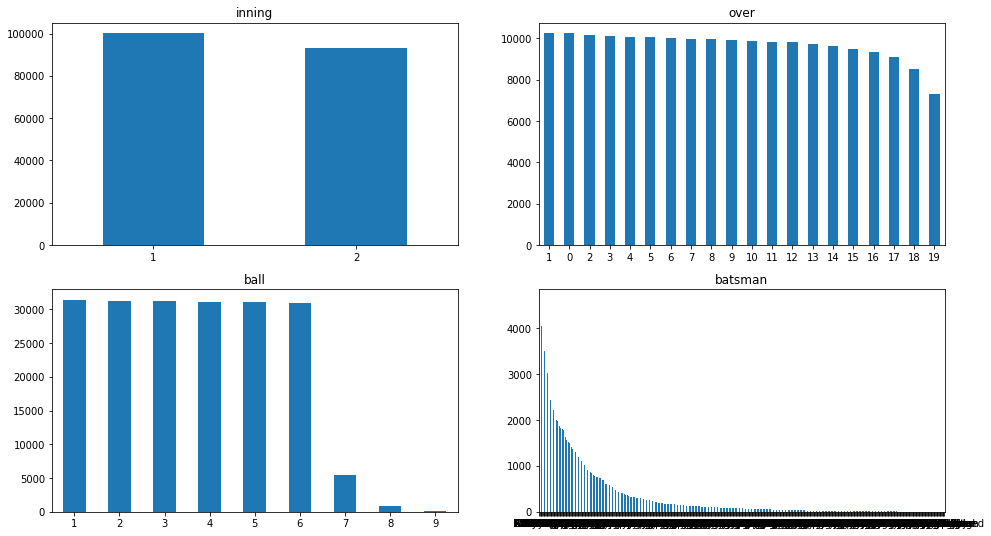

In [15]:
# Over all Data
plt.subplot(221)

deliveries_data['inning'].value_counts().plot(kind='bar', title='inning', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

deliveries_data['over'].value_counts().plot(kind='bar', title='over')

plt.xticks(rotation=0)

plt.subplot(223)

deliveries_data['ball'].value_counts().plot(kind='bar', title='ball')

plt.xticks(rotation=0)

plt.subplot(224)

deliveries_data['batsman'].value_counts().plot(kind='bar', title='batsman')

plt.xticks(rotation=0)

plt.show()

Observation : Review of IPL between inning ,over,ball,batsman . Here the subplot(221) means it consists of two Rows and two Columns.figsize returns the height and width of a figure.Title attribute returns the title of the figure.

In [46]:
#Merge both data set in (df_total)
df_total = pd.merge(match_data, deliveries_data, left_on='id', right_on='id',how='outer')

In [17]:
df_total.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [45]:
df_total.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'umpire1', 'umpire2', 'inning', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team', 'Year'],
      dtype='object')

In [19]:
#Shape of df_total Total dataset
df_total.shape 

(193468, 33)

1.How many matches are played each year in IPL?

In [43]:
df_total["Year"] = df_total["date"].apply(lambda x:x.split("-")[0])
df_total['Year'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [42]:
match_count = df_total['Year'].value_counts().sort_index()

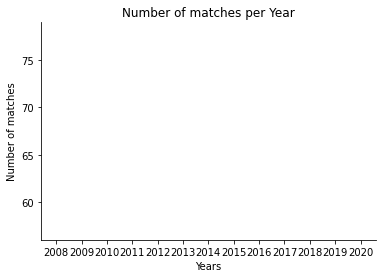

In [47]:
sns.lineplot(x = match_count.index, y = match_count.values, )
sns.despine()
plt.ylabel('Number of matches')
plt.xlabel('Years')
plt.ylim((56, 79))
_ = plt.title('Number of matches per Year')

2. How many matches did the teams played throughout the IPL(2008-2020)?

In [48]:
# Total matches played by a team
partial_count1 = df_total['team1'].value_counts()
partial_count2 = df_total['team2'].value_counts()
total_matches = np.add(partial_count1, partial_count2).sort_values(ascending = False)
total_matches.head()

Mumbai Indians                 48919
Royal Challengers Bangalore    45730
Kolkata Knight Riders          45137
Kings XI Punjab                45079
Chennai Super Kings            42679
dtype: int64

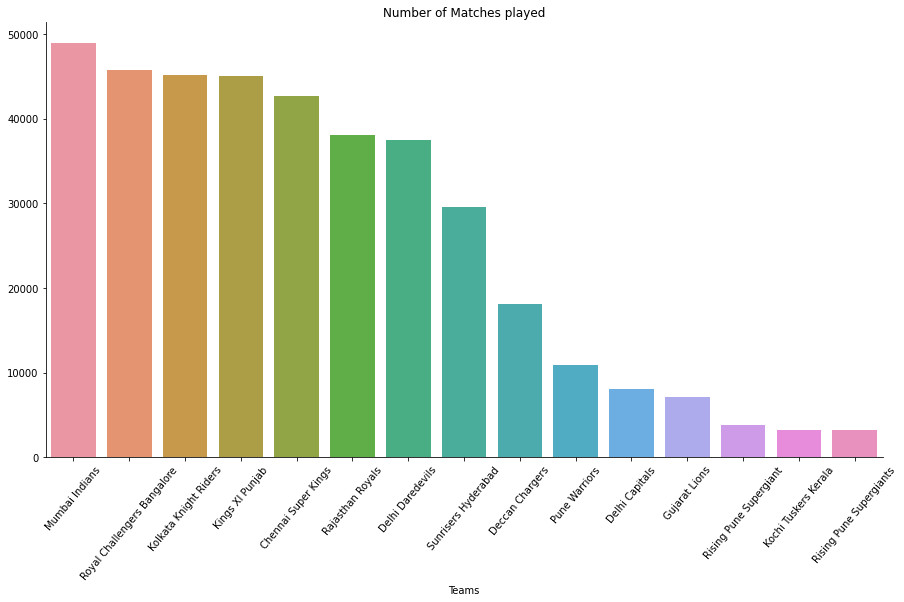

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x = total_matches.index, y = total_matches.values)

sns.despine()
_ = plt.xticks(rotation = 50)
plt.title('Number of Matches played')
_ = plt.xlabel('Teams')

3. Which player was awarded the Player of the Match most number of times?

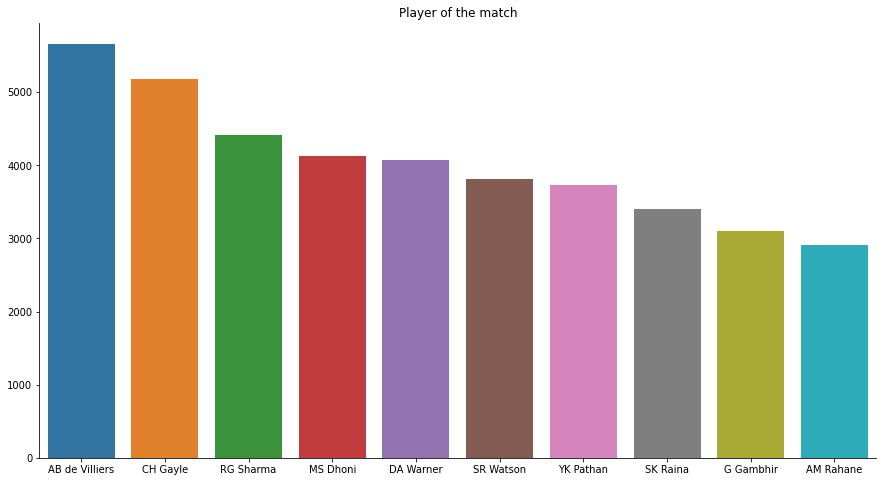

In [25]:
plt.figure(figsize=(15,8))
pom = df_total['player_of_match'].value_counts().sort_values(ascending=False).iloc[:10]
sns.barplot(x=pom.index,  y = pom.values, data=df_total)
sns.despine()
_ = plt.title('Player of the match')

AB de Villiers was awarded Player of the match most number of times.

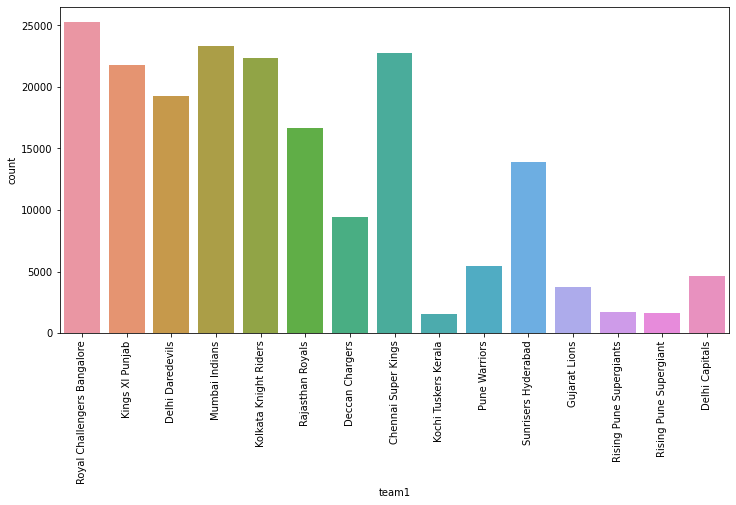

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'team1',data=df_total)
plt.xticks(rotation=90)
plt.show()

4.Most Wins in an Eliminato

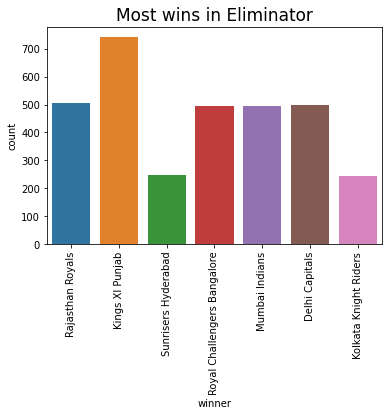

In [27]:
sns.countplot(df_total['winner'][df_total['eliminator']=='Y'],data=df_total)
plt.title("Most wins in Eliminator",fontsize=17)
plt.xticks(rotation=90)
plt.show()

Most of the times eliminator team is Kings XI Punjab 

5.Famous Venue

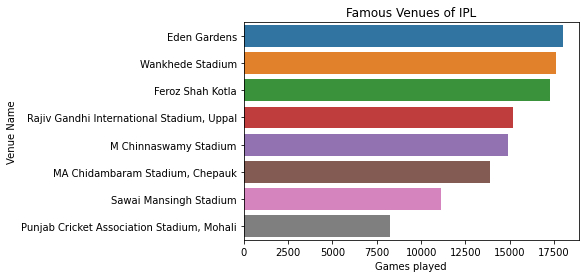

In [28]:
sns.barplot(x=df_total['venue'].value_counts().head(8).values,y=df_total['venue'].value_counts().head(8).index,data=df_total)
plt.title("Famous Venues of IPL")
plt.xlabel("Games played")
plt.ylabel("Venue Name")
plt.show()

Eden Gardens Stadium is the most famous venue for ipl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0be0e6f790>]],
      dtype=object)

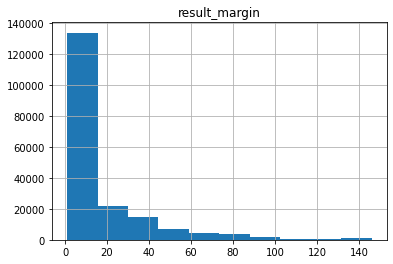

In [29]:
df_total.hist(column='result_margin')

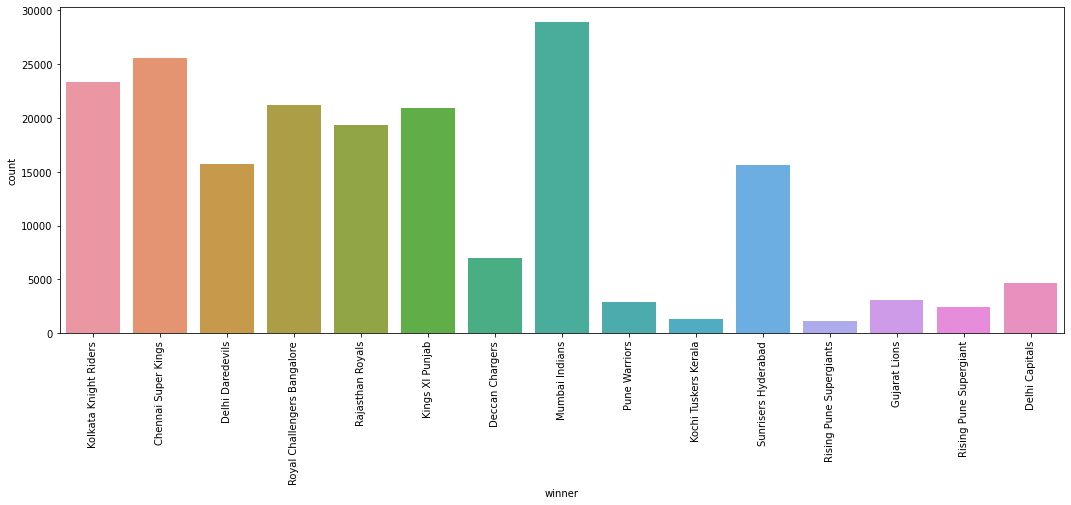

In [30]:
plt.figure(figsize=(18,6))
sns.countplot(x= 'winner',data=df_total) #Show count plot of winner
plt.xticks(rotation=90)
plt.show()

6.Winn/Lose according to toss decision

In [31]:
teams=df_total['toss_winner'].unique()
decision_making=pd.DataFrame([],columns=['Toss Winner','Decision','Times'])
for id,element in enumerate(teams):
    temp_bat=df_total[(df_total['toss_winner']==element) & (df_total['toss_decision']=='bat')]
    temp_field=df_total[(df_total['toss_winner']==element) & (df_total['toss_decision']=='field')]
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'bat','Times':temp_bat['toss_winner'].count()},ignore_index=True)
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'field','Times':temp_field['toss_winner'].count()},ignore_index=True)

In [32]:
decision_making #Decision 

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,5833
1,Royal Challengers Bangalore,field,14621
2,Chennai Super Kings,bat,12196
3,Chennai Super Kings,field,11064
4,Rajasthan Royals,bat,8220
5,Rajasthan Royals,field,12414
6,Mumbai Indians,bat,11603
7,Mumbai Indians,field,13801
8,Deccan Chargers,bat,5756
9,Deccan Chargers,field,4620


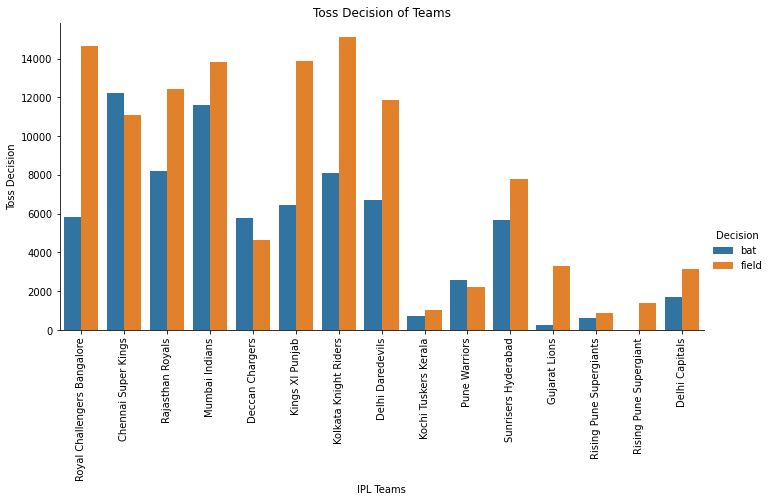

In [33]:
sns.catplot(x="Toss Winner",y='Times',hue="Decision",data=decision_making,kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.title("Toss Decision of Teams")
plt.xlabel("IPL Teams")
plt.ylabel("Toss Decision")
plt.show()

7.Total matches played per season

In [34]:
#Total matches played per season.
match_per_season = df_total.groupby(['Year'])['id'].count().reset_index().rename(columns={'id':'Matches'}) #Reset_Index helps make it into a dataframe.
match_per_season

,Year,Matches
0,2008,13489
1,2009,13595
2,2010,14489
3,2011,17013
4,2012,17767
5,2013,18152
6,2014,14288
7,2015,13641
8,2016,14096
9,2017,13849


Text(0.5, 1.0, 'Matches Played Per Season')

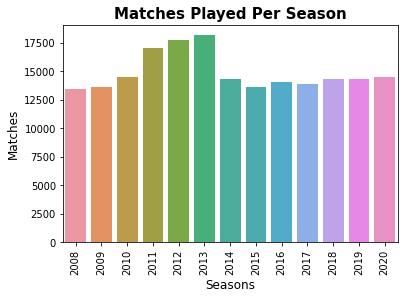

In [35]:

sns.countplot(df_total['Year']) #Plot countplot as it is.
plt.xticks(rotation = 90, fontsize = 10) #Stylize on X axis.
plt.yticks(fontsize = 10) #Stylize X axis.
plt.xlabel('Seasons', fontsize  = 12 ) #Stylize X header.
plt.ylabel('Matches', fontsize = 12) #Stylize X header.
plt.title('Matches Played Per Season', fontsize = 15, fontweight = 'bold') #Add and stylize title.

8.Top 10 wicket taking bowlers.

In [49]:
#Drow a pie chart for top 10 wicket taking bowlers.
wickets_bowler = df_total.groupby(['bowler'])['dismissal_kind'].count().reset_index()
wickets_bowler.columns = ['Bowler', 'Wickets']
y = wickets_bowler.sort_values(by='Wickets', ascending = False).head(10).reset_index().drop('index', axis=1)
y

,Bowler,Wickets
0,SL Malinga,188
1,DJ Bravo,175
2,A Mishra,169
3,PP Chawla,164
4,Harbhajan Singh,161
5,R Ashwin,153
6,B Kumar,146
7,SP Narine,143
8,UT Yadav,137
9,R Vinay Kumar,127


In [50]:
y.set_index('Bowler', inplace=True) #Change index with Bowler name column.

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

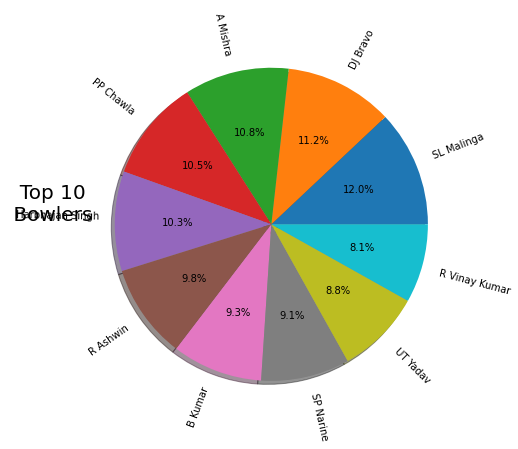

In [54]:
plt.figure(figsize=(20,8))
y['Wickets'].plot.pie(autopct='%1.1f%%', shadow = True , rotatelabels=True, radius = 0.9)
plt.ylabel('  Top 10 ' '\n Bowlers',fontsize=20,rotation = 0)
plt.yticks(fontsize=10)

Top wiket taking bowler is SL Malinga

#Conclusion:
 1.Finally this dataset tell us about the runs,batsman,wickets,extra runs,total runs etc..... 
 
 2.The IPl dataset can be analyzed using many more graph techniques and also for visualize than,as described in this notebook.